In [1]:
#importing Libaries for understanding data
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline

In [19]:
#importing data file 
data = pd.read_csv(r'C:\Users\MrWizard\Desktop\Step-i Internship\ml\Data.csv',index_col=0)
data.head()

,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8
NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
S.No.,College,Role,City type,Previous CTC,Previous job changes,Graduation marks,Exp (Months),CTC
1,Tier 1,Manager,Non-Metro,"55,523.00",3,66,19,"71,406.58"
2,Tier 2,Executive,Metro,"57,081.00",1,84,18,"68,005.87"
3,Tier 2,Executive,Metro,"60,347.00",2,52,28,"76,764.02"


In [20]:
headers = data.iloc[1]
df  = pd.DataFrame(data.values[2:], columns=headers)

In [21]:
df

S.No.,College,Role,City type,Previous CTC,Previous job changes,Graduation marks,Exp (Months),CTC
0,Tier 1,Manager,Non-Metro,"55,523.00",3,66,19,"71,406.58"
1,Tier 2,Executive,Metro,"57,081.00",1,84,18,"68,005.87"
2,Tier 2,Executive,Metro,"60,347.00",2,52,28,"76,764.02"
3,Tier 3,Executive,Metro,"49,010.00",2,81,33,"82,092.39"
4,Tier 3,Executive,Metro,"57,879.00",4,74,32,"73,878.10"
...,...,...,...,...,...,...,...,...
1333,Tier 3,Executive,Metro,"59,661.00",4,68,50,"69,712.40"
1334,Tier 1,Executive,Non-Metro,"53,714.00",1,67,18,"69,298.75"
1335,Tier 2,Executive,Non-Metro,"61,957.00",1,47,18,"66,397.77"
1336,Tier 1,Executive,Non-Metro,"53,203.00",3,69,21,"64,044.38"


In [22]:
dv=df # for visualization 

In [23]:
dv.to_csv (r'C:\Users\MrWizard\Desktop\Step-i Internship\ml\export.csv', index = False, header=True)


## 1)Understanding Data

In [24]:
#checking if there are any null values
df.isnull().any()

S.No.
College                 False
Role                    False
City type               False
Previous CTC            False
Previous job changes    False
Graduation marks        False
Exp (Months)            False
CTC                     False
dtype: bool

There are no null values 

In [25]:
df.shape

(1338, 8)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   College               1338 non-null   object
 1   Role                  1338 non-null   object
 2   City type             1338 non-null   object
 3   Previous CTC          1338 non-null   object
 4   Previous job changes  1338 non-null   object
 5   Graduation marks      1338 non-null   object
 6   Exp (Months)          1338 non-null   object
 7   CTC                   1338 non-null   object
dtypes: object(8)
memory usage: 83.8+ KB


In [27]:
#checking unique values 
print("unique in college column:  ",df.College.unique())
print("unique in role column:     ",df.Role.unique())
print("unique in city type column:",df['City type'].unique())

unique in college column:   ['Tier 1' 'Tier 2' 'Tier 3']
unique in role column:      ['Manager' 'Executive']
unique in city type column: ['Non-Metro' 'Metro']


In [68]:
df.info()

,Previous CTC,Previous job changes,Graduation marks,Exp (Months),CTC,College_Tier 2,College_Tier 3,Role_Manager,City_Metro
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,55581.762332,2.525411,59.890882,39.207025,75459.339036,0.272048,0.242900,0.204783,0.505232
std,6685.600553,1.123502,14.894696,14.049960,12551.280147,0.445181,0.428995,0.403694,0.500160
min,36990.000000,1.000000,35.000000,18.000000,53020.320000,0.000000,0.000000,0.000000,0.000000
25%,50547.000000,2.000000,47.000000,27.000000,66905.067500,0.000000,0.000000,0.000000,0.000000
50%,55293.500000,3.000000,60.000000,39.000000,73112.640000,0.000000,0.000000,0.000000,1.000000
75%,60150.500000,4.000000,73.000000,51.000000,80747.175000,1.000000,0.000000,0.000000,1.000000
max,77911.000000,4.000000,85.000000,64.000000,123416.990000,1.000000,1.000000,1.000000,1.000000


###  2)Transform categorical variables to the numerical variables

In [28]:
#changing object datatype to int
df['Previous job changes'] = df['Previous job changes'].astype(int)
df['Graduation marks'] = df['Graduation marks'].astype(int)
df['Exp (Months)'] = df['Exp (Months)'].astype(int)

#because of comma in between no like 5,00,000 we are using this to make it 500000 because astype doesnt work here
df["Previous CTC"] = [float(str(i).replace(",", "")) for i in df["Previous CTC"]]
df["CTC"] = [float(str(i).replace(",", "")) for i in df["CTC"]]

In [31]:
df=pd.get_dummies(df,drop_first=True)


In [32]:
df.head()

,Previous CTC,Previous job changes,Graduation marks,Exp (Months),CTC,College_Tier 2,College_Tier 3,Role_Manager,City type_Non-Metro
0,55523.0,3,66,19,71406.58,0,0,1,1
1,57081.0,1,84,18,68005.87,1,0,0,0
2,60347.0,2,52,28,76764.02,1,0,0,0
3,49010.0,2,81,33,82092.39,0,1,0,0
4,57879.0,4,74,32,73878.10,0,1,0,0


In [33]:
df['City_Metro'] = df['City type_Non-Metro'].map({1:0, 0:1})


In [34]:
df.drop(['City type_Non-Metro'],axis=1,inplace=True)
df.head()

,Previous CTC,Previous job changes,Graduation marks,Exp (Months),CTC,College_Tier 2,College_Tier 3,Role_Manager,City_Metro
0,55523.0,3,66,19,71406.58,0,0,1,0
1,57081.0,1,84,18,68005.87,1,0,0,1
2,60347.0,2,52,28,76764.02,1,0,0,1
3,49010.0,2,81,33,82092.39,0,1,0,1
4,57879.0,4,74,32,73878.10,0,1,0,1


### Test data

In [44]:
tf = pd.read_csv(r'C:\Users\MrWizard\Desktop\Step-i Internship\ml\Test_data.csv')
tf.head()

,College,Role,City type,College_T1,College_T2,Role_Manager,City_Metro,previous CTC,previous job changes,Graduation marks,...,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23
0,Tier 1,Manager,Non-Metro,1,0,1,0,55523,3,66,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Tier 2,Executive,Metro,0,1,0,1,57081,1,84,...,NaN,32438.76192,4659.731658,-832.274662,19359.9439,4080.577268,0.451593,-29.041071,-3.65235,258.940639
2,Tier 2,Executive,Metro,0,1,0,1,60347,2,52,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Tier 3,Executive,Metro,0,0,0,1,49010,2,81,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Tier 3,Executive,Metro,0,0,0,1,57879,4,74,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [45]:
tf=tf.drop(['College','Role','City type',"Unnamed: 13","Unnamed: 14", "Unnamed: 15","Unnamed: 16","Unnamed: 17","Unnamed: 18","Unnamed: 19","Unnamed: 20","Unnamed: 21","Unnamed: 22","Unnamed: 23","Predicted CTC"], axis = 1)
tf.rename(columns={"previous CTC": "Previous CTC", "previous job changes": "Previous job changes", "Exp": "Exp (Months)"}, inplace=True)
tf.head()

,College_T1,College_T2,Role_Manager,City_Metro,Previous CTC,Previous job changes,Graduation marks,Exp (Months),Actual CTC
0,1,0,1,0,55523,3,66,19,71406.57653
1,0,1,0,1,57081,1,84,18,68005.87063
2,0,1,0,1,60347,2,52,28,76764.02028
3,0,0,0,1,49010,2,81,33,82092.38688
4,0,0,0,1,57879,4,74,32,73878.09773


In [46]:
tf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   College_T1            1338 non-null   int64  
 1   College_T2            1338 non-null   int64  
 2   Role_Manager          1338 non-null   int64  
 3   City_Metro            1338 non-null   int64  
 4   Previous CTC          1338 non-null   int64  
 5   Previous job changes  1338 non-null   int64  
 6   Graduation marks      1338 non-null   int64  
 7   Exp (Months)          1338 non-null   int64  
 8   Actual CTC            1338 non-null   float64
dtypes: float64(1), int64(8)
memory usage: 94.2 KB


In [38]:
test.to_csv (r'C:\Users\MrWizard\Desktop\Step-i Internship\ml\TT.csv', index = False, header=True)


### Data Visualization

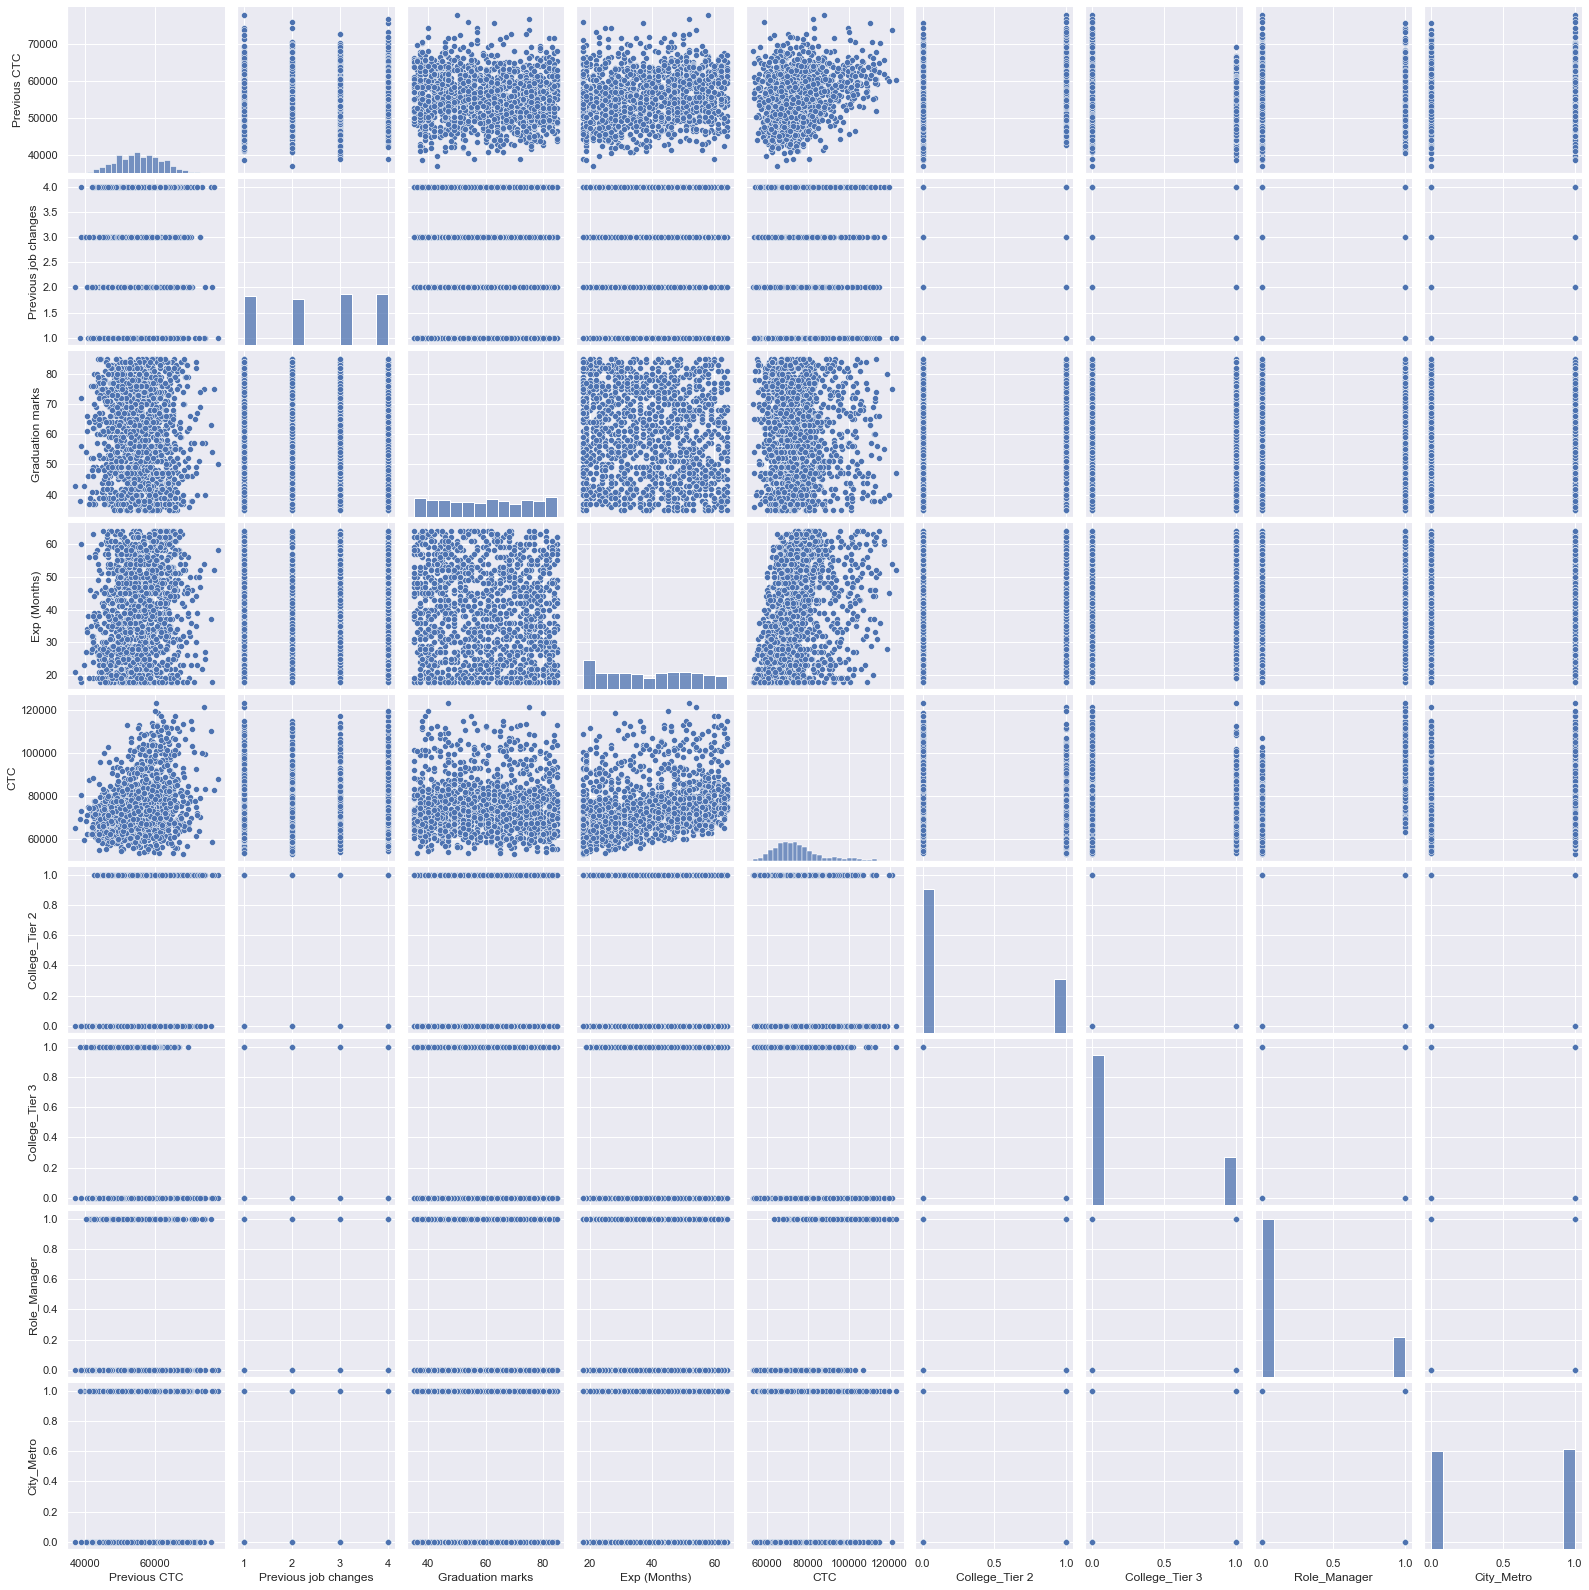

In [66]:
sb.pairplot(df)

<AxesSubplot:>

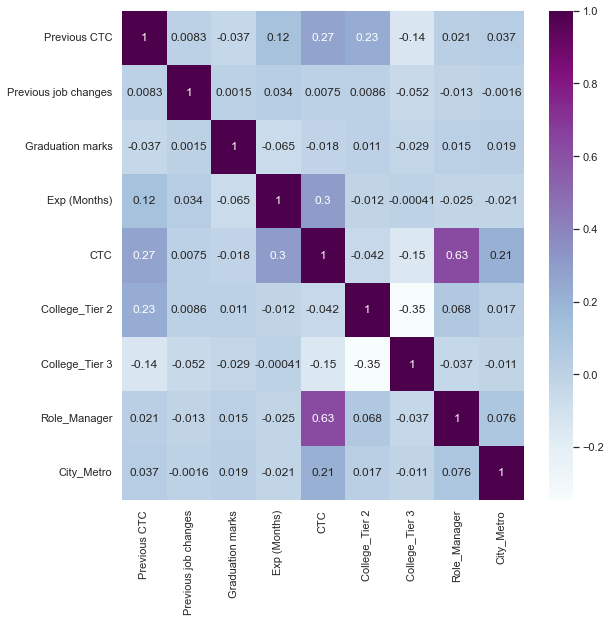

In [41]:
#Heatmap
plt.figure(figsize=(9,9))
sb.heatmap(df.corr(), annot=True,cmap='BuPu' )

In [67]:
df.corr()

,Previous CTC,Previous job changes,Graduation marks,Exp (Months),CTC,College_Tier 2,College_Tier 3,Role_Manager,City_Metro
Previous CTC,1.000000,0.008282,-0.037170,0.117035,0.270260,0.232138,-0.135957,0.021208,0.036956
Previous job changes,0.008282,1.000000,0.001507,0.034137,0.007518,0.008599,-0.052387,-0.013131,-0.001568
Graduation marks,-0.037170,0.001507,1.000000,-0.065412,-0.017557,0.010571,-0.029326,0.014541,0.018550
Exp (Months),0.117035,0.034137,-0.065412,1.000000,0.301569,-0.011642,-0.000407,-0.025019,-0.020856
CTC,0.270260,0.007518,-0.017557,0.301569,1.000000,-0.041814,-0.149194,0.625435,0.211258
College_Tier 2,0.232138,0.008599,0.010571,-0.011642,-0.041814,1.000000,-0.346265,0.068498,0.017117
College_Tier 3,-0.135957,-0.052387,-0.029326,-0.000407,-0.149194,-0.346265,1.000000,-0.036945,-0.011156
Role_Manager,0.021208,-0.013131,0.014541,-0.025019,0.625435,0.068498,-0.036945,1.000000,0.076185
City_Metro,0.036956,-0.001568,0.018550,-0.020856,0.211258,0.017117,-0.011156,0.076185,1.000000


In [ ]:
dv.columns

<AxesSubplot:xlabel='College', ylabel='CTC'>

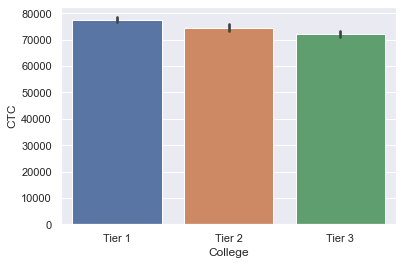

In [69]:
sb.barplot(y='CTC',x='College',data=dv)


<AxesSubplot:xlabel='Role', ylabel='CTC'>

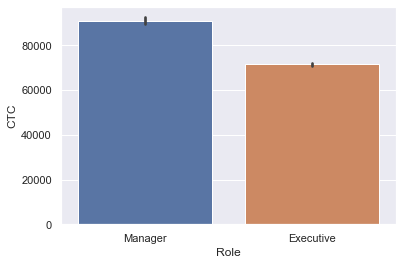

In [70]:
sb.barplot(x='Role',y='CTC',data=dv) 

<AxesSubplot:xlabel='City type', ylabel='CTC'>

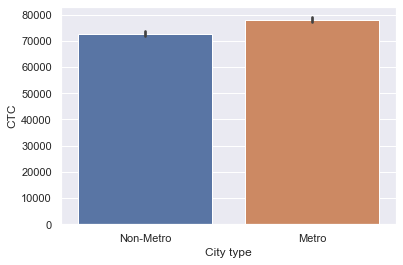

In [71]:
sb.barplot(x='City type',y='CTC',data=dv)        #0=Non Metro 1 = Metro

<AxesSubplot:xlabel='City type', ylabel='CTC'>

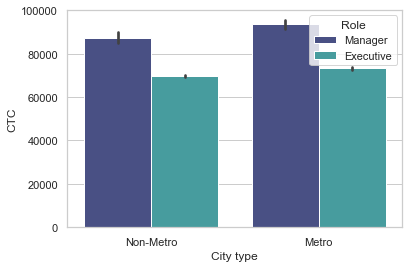

In [136]:
sb.barplot(x='City type',y='CTC',hue='Role',palette="mako",data=dv)
#sb.plt.show(srew)

<AxesSubplot:xlabel='City type', ylabel='CTC'>

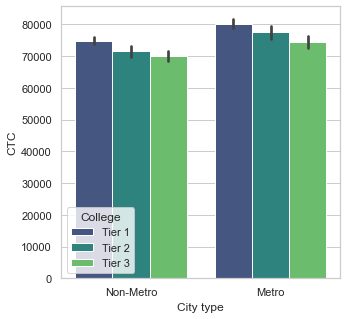

In [151]:
plt.figure(figsize=(5,5))
sb.barplot(x='City type',y='CTC',hue='College',palette="viridis",data=dv)


<AxesSubplot:xlabel='Exp (Months)', ylabel='CTC'>

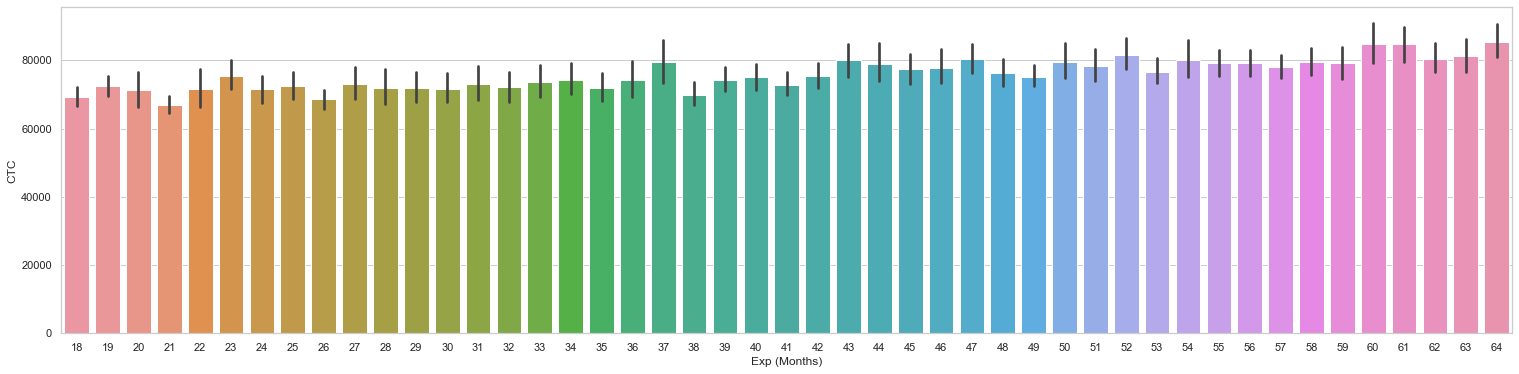

In [72]:
plt.figure(figsize=(26,6))
sb.set_theme(style="whitegrid")

sb.barplot(x='Exp (Months)',y='CTC',data=df)

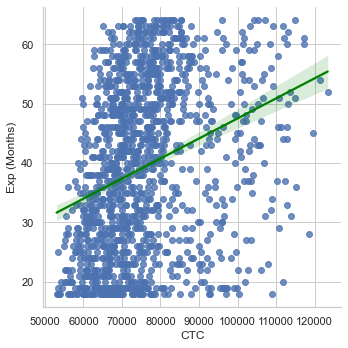

In [79]:
sb.lmplot(x='CTC',y='Exp (Months)',data=df,line_kws={'color':'green'})

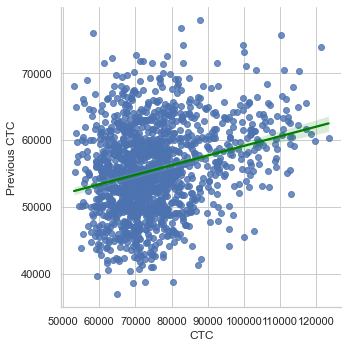

In [80]:
sb.lmplot(x='CTC',y='Previous CTC',data=df,line_kws={'color':'green'})

#### Checking distribution

<AxesSubplot:xlabel='CTC', ylabel='Count'>

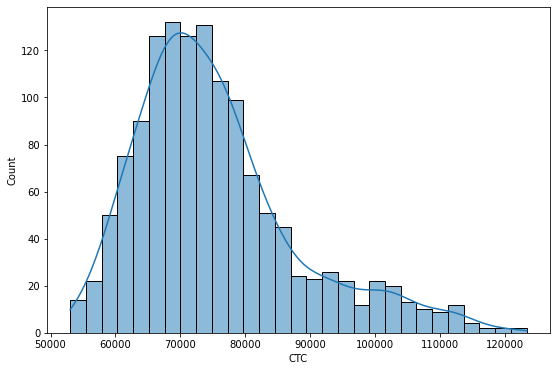

In [39]:
plt.figure(figsize=(9,6))
sb.histplot(df, x='CTC', kde=True)

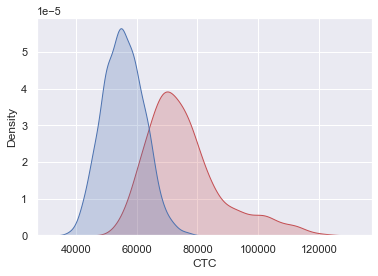

In [40]:
sb.set(style="darkgrid")
fig = sb.kdeplot(df['CTC'], shade=True, color="r")
fig = sb.kdeplot(df['Previous CTC'], shade=True, color="b")
plt.show()

In [ ]:
std=df

## 3) Apply linear regression to predict the CTC

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
#std=sc.fit_transform(std)

In [43]:
X=df.drop(["CTC"],axis=1)
Y=df["CTC"]

In [48]:
x = tf.drop(['Actual CTC'],axis=1)
y = tf['Actual CTC']

In [49]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size = 0.3, random_state = 104)

In [50]:
print('X_train',X_train.shape)
print('X_test',X_test.shape)
print('Y_train',Y_train.shape)
print('Y_test',Y_test.shape)

X_train (936, 8)
X_test (402, 8)
Y_train (936,)
Y_test (402,)


In [51]:
lr = LinearRegression()
lr.fit(X_train, Y_train)

LinearRegression()

In [52]:
prediction = lr.predict(X)
tf['Predicted CTC'] = prediction
tf

,College_T1,College_T2,Role_Manager,City_Metro,Previous CTC,Previous job changes,Graduation marks,Exp (Months),Actual CTC,Predicted CTC
0,1,0,1,0,55523,3,66,19,71406.57653,86172.557834
1,0,1,0,1,57081,1,84,18,68005.87063,66263.535770
2,0,1,0,1,60347,2,52,28,76764.02028,70501.329477
3,0,0,0,1,49010,2,81,33,82092.38688,66671.377243
4,0,0,0,1,57879,4,74,32,73878.09773,70566.624490
...,...,...,...,...,...,...,...,...,...,...
1333,0,0,0,1,59661,4,68,50,69712.40366,75962.579094
1334,1,0,0,0,53714,1,67,18,69298.75010,65859.021026
1335,0,1,0,0,61957,1,47,18,66397.77069,64591.907677
1336,1,0,0,0,53203,3,69,21,64044.38295,66244.487914


### 4)Evaluate the results of the analysis

In [54]:
#coefficients of the features 
lr.coef_

array([ 4.73708756e-01, -5.42423720e+01, -7.53915324e+00,  2.50365038e+02,
       -5.32267769e+03, -4.81538350e+03,  1.93071782e+04,  4.26038066e+03])

In [53]:
#intercept of the best line fit
lr.intercept_


36467.02386690573

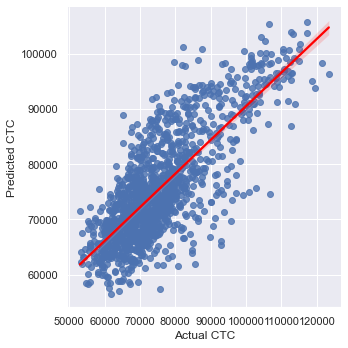

In [64]:
sb.lmplot(x='Actual CTC', y= 'Predicted CTC' , data = tf, line_kws={'color':'red'})


the red line is best fit line for our regression model

In [81]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

In [ ]:
accuracy_score(Y,prediction)


In [ ]:
f1_score(Y,prediction)


In [65]:
#print the r2 score, Mean Absolute Error and Mean Squaredction Error
print(f'r2_score of this model:{r2_score(Y,prediction)}')
print(f'MAE of this model:{mean_absolute_error(Y,prediction)}')
print(f'MSE of this model:{mean_squared_error(Y,prediction)}')

r2_score of this model:0.6077458742349957
MAE of this model:6168.028390067937
MSE of this model:61747426.304770775


In [104]:
print('R2_Score               :',r2_score(Y,prediction))
print('Mean Absolute Error    :',mean_absolute_error(Y,prediction))
print('Mean Square Error      :',mean_squared_error(Y,prediction))
print('Root Mean Square Error :',np.sqrt(mean_squared_error(y,prediction)))


R2_Score               : 0.6077458742349957
Mean Absolute Error    : 6168.028390067937
Mean Square Error      : 61747426.304770775
Root Mean Square Error : 7857.953166106708


In [106]:
#adjusted R2 score
1 - ( 1-lr.score(X, Y) ) * ( len(Y) - 1 ) / ( len(Y) - X.shape[1] - 1 )


0.6053846755847925

#### R2
* (Coefficient of determination) represents the coefficient of how well the values fit compared to the original values. The value from 0 to 1 interpreted as percentages. The higher the value is, the better the model is.

#### MAE
* 

#### MSE
* The units of the MSE are squared units.this can be confusing therefore when reporting results, often the root mean squared error is used instead  
* The MSE is calculated as the mean or average of the squared differences between predicted and expected target values 

#### RMSE
* A perfect RMSE value is 0.0, which means that all predictions matched the expected values exactly.
* This is almost never the case, and if it happens, it suggests your predictive modeling problem is trivial.
* A good RMSE is relative to your specific dataset.

#### Conclusion:
* data is not uniformly distributed we can see that in distribution histogram(beta distribution)
* We got the r2_score of 0.61 ,the more closer it is to 1 the better is the  model
* best fit line of our regression model is : 36467.0238
* tier 1 college of metro city has high ctc as compared to others